In [1]:
%matplotlib inline

In [15]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

##### 말뭉치

In [2]:
import nltk
nltk.download("book")
nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hyeonjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\hyeonjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\hyeonjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\hyeonjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\hyeonjin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\

True

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
import nltk
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

##### 토큰화
- 말뭉치(텍스트 데이터)를 '토큰'이라고 하는 작은 단위로 나누는 행위
- 토큰 : 문장, 단어, 형태소 등 분석에 있어서 의미를 가지는 단위
    - 토큰의 실제 이름은 실제 토큰의 활용과 관계가 없음
    - 숫자 혹은 기호로 나타내거나 품사 등을 덧붙여서 쓰는 경우도 있음
        - 영어 : 보통 단어를 하나의 토큰으로 씀
        - 한글 : 보통 형태소 기준으로 나눠 토큰으로 사용함
- 형태소 : 일정한 의미가 있는 가장 작은 말의 단위
    - 형태소 분석 : 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업
        - 어간 추출
        - 원형 복원
        - 품사 부착

##### 정규화 (Normalization)
- 의미와 쓰임이 같은 단어를 같은 토큰으로 표시
- 대소문자 통합 (case removal)
- 어간 추출 (stemming)
    - 단어를 어간과 접사로 분리하여 단순히 접사를 삭제하거나 교체
        - 어간(stem) : 단어의 의미를 담고 있는 핵심 부분
        - 접사(affix) : 단어에 부가적인 의미를 주는 부분
    - 단순 알고리즘 사용
        - 포터(Porter) 알고리즘
        - 랭케스터(Lancaster) 알고리즘
- 표제어 추출 (lemmaization)
    - 기본 사전형 단어로 변형
    - am, is, are, was => be
    - has had => have
- 품사 부착 (Part-Of-Speech tagging)
    - 단어의 쓰임에 따른 구분
    - 동일한 철자의 단어가 다른 의미나 다른 품사로 쓰이는 경우
        - 다른 토큰으로 토큰화 해야함
        - Permit : 허락하다(동사), 허가증(명사)
- 불용어 (stopwords)
    - 분석의 필요성이 없는 단어
    - 모든 문서에서 너무 자주 쓰이는 단어
    - 너무 드물게 나타나는 단어

In [3]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [4]:
# 토큰화
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

In [5]:
# 어간 추출방법
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])
# flew flown 등은 분류를 못한 것 -> 알고리즘의 한계

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [6]:
# 표제어 추출
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

# pos : 명사 or 동사 등을 지정 가능
[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [7]:
#품사 부착
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
# 토큰화 -> pos_tag를 이용해 품사 부착
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list
# 품사 태그
# NNP : 고유 대명사
# VBD : 동사의 과거형
# TO : 전치사 to
# VB : 동사
# NN : 명사
# 최종 결과물 -> 튜플의 리스트로 추출됨

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [8]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

##### NLTK 빈도분석
- Text 클래스
    - plot : 단어 빈도 그래프
    - dispersion_plot : 단어 위치 그래프
    - concordance : 단어 문맥 인쇄
    - smilar : 유사 단어 검색
- FreqDist 클래스

In [9]:
from nltk import Text
# 클래스 객체 생성
# 원문을 토큰화 해서 넣어줘야함
text = Text(word_tokenize(emma_raw))

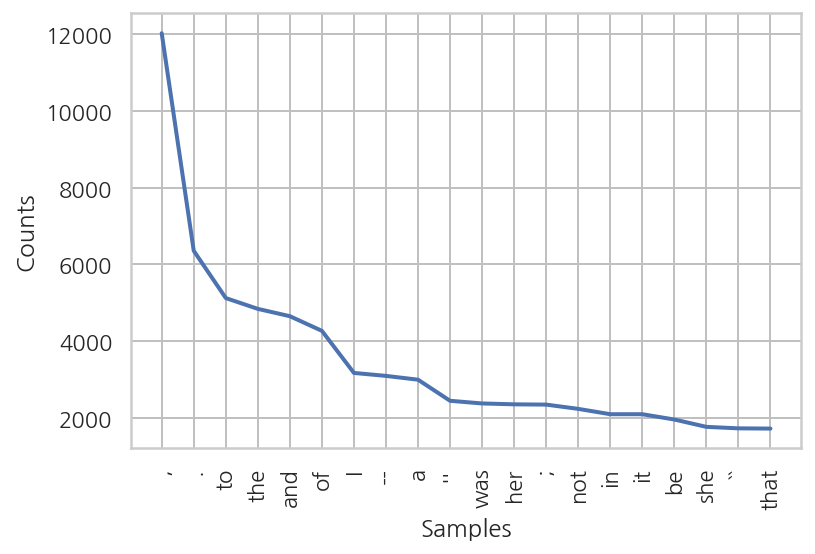

In [11]:
# 가장 많이 쓰인 단어 20개 출력
plt.figure(facecolor="1.")
text.plot(20)
plt.show()

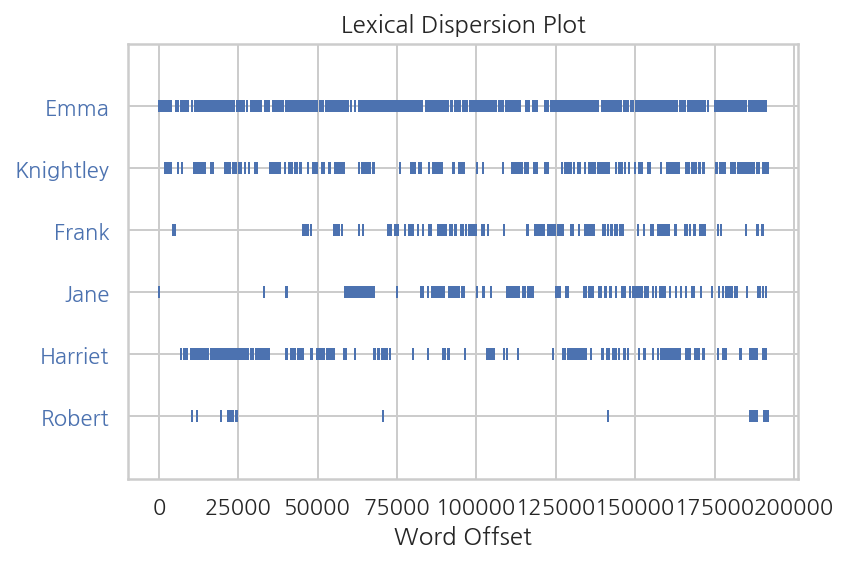

In [13]:
# 단어 위치 그래프
plt.figure(facecolor="1.")
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [14]:
# 단어 문맥 인쇄
text.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

In [15]:
# 유사 단어 검색
# emma 대신 가장 많이 쓰인 단어
text.similar("Emma", 1)

she


In [16]:
# 공통 문맥 인쇄
text.common_contexts(["Emma", "she"], 1)

but_was


##### FreqDist
- 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
- Text 클래스의 vocab 메서드로 추출
- 토큰 리스트를 넣어서 직접 만들 수 있음
- 빈도 분석에 유용한 여러가지 메서드를 제공
    - N : 빈도(횟수)
    - freq : 빈도(퍼센트)
    - most_common : 가장 많이 나오는 단어
    - plot : 가장 많이 나오는 단어 플롯

In [17]:
# 1. 클래스 생성
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [19]:
# 2. 토큰 리스트에서 생성
# pos tag를 이용해서 emma를 토큰화

from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw))
# 품사가 NNP = 고유 대명사, stopwords는 제외 -> 이름의 리스트 출력
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [20]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(6924, 829, 0.11972848064702483)

In [21]:
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

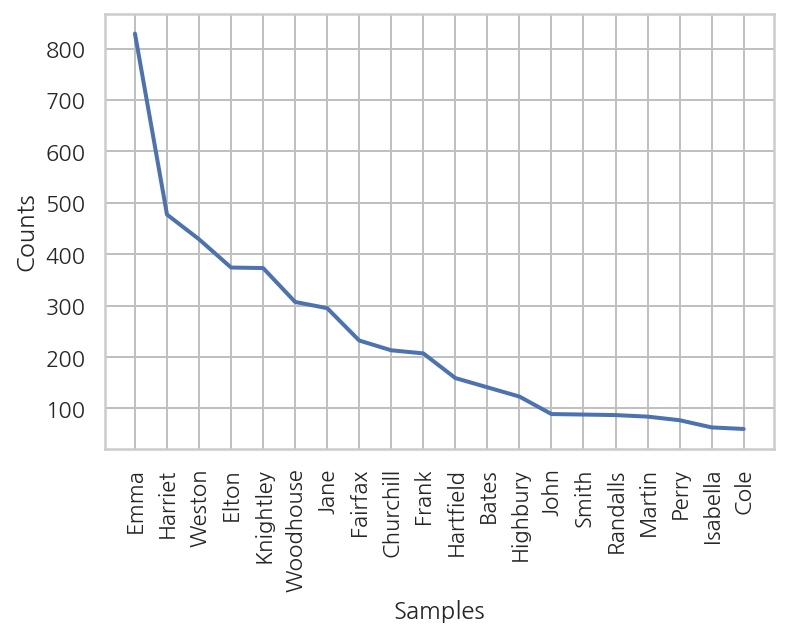

In [22]:
plt.figure(facecolor="1.")
fd_names.plot(20)
plt.show()

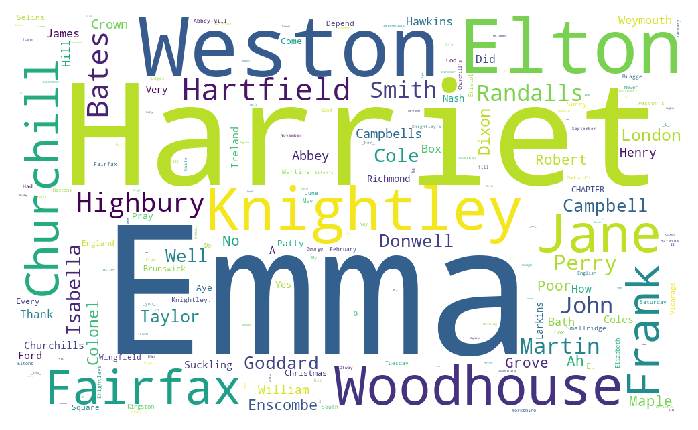

In [26]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

In [32]:
# 연습문제
alice_raw = nltk.corpus.gutenberg.raw("carroll-alice.txt")

fd2 = text.vocab()

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
alice_tokens = pos_tag(word_tokenize(alice_raw))
# 품사가 NNP = 고유 대명사, stopwords는 제외 -> 이름의 리스트 출력
names_list = [t[0] for t in alice_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd2_names = FreqDist(names_list)

In [33]:
fd2_names.most_common(5)

[('Alice', 391), ('Queen', 71), ('King', 60), ('Turtle', 58), ('Mock', 56)]

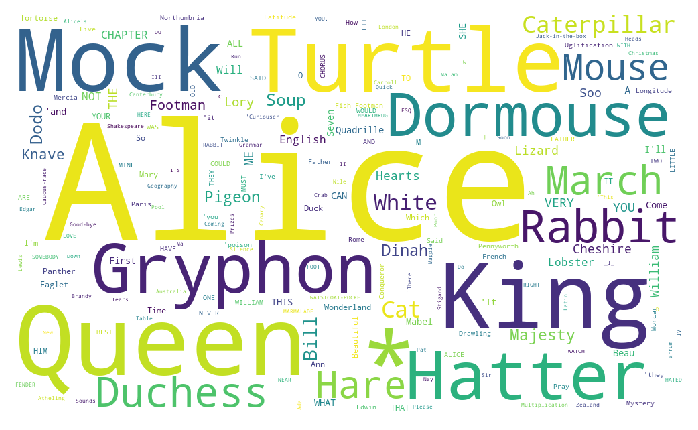

In [34]:
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd2_names))
plt.axis("off")
plt.show()

##### KoNLPy 한국어 처리 패키지
